In [20]:
from fit_completeness_to_catalog import *
name = "sullivan"
cut_to_Ms = True
nwalkers = 24
ndim = 8
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Selected 907 stars


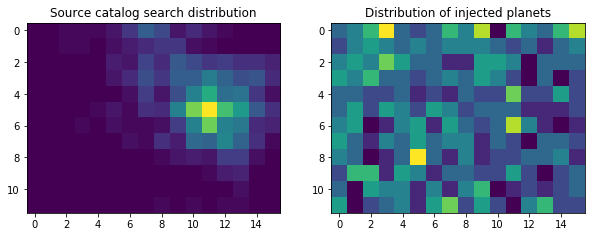

Injected 596 transiting planets


In [47]:
catalog, num_stars = get_catalog_and_numstars(name, cut_to_Ms)
synth = make_synth_solar_systems(num_stars=10000)
synth = synth[synth.transit_bool]
hist_synth, hist_catalog = make_hists(synth, catalog)
print("Injected {} transiting planets".format(int(np.sum(hist_synth))))

In [39]:
ll, p0 = make_mcmc_setup(hist_synth, hist_catalog, nwalkers)
sampler = emcee.EnsembleSampler(nwalkers, ndim, ll)
_ = sampler.run_mcmc(p0, 1000, progress="notebook")
sampler.reset()
pos, _, _ = sampler.run_mcmc(p0, 5000, store=True, progress="notebook")

Found least-squares solution: [ 1.52134198e+00 -1.42999586e-02  8.53112464e-05  5.63668786e-02
  1.05857892e-01 -1.79566735e-02  1.22221717e-02 -5.24558134e-02]
Set initial condition


In [34]:
# _ = corner.corner(sampler.flatchain)

In [40]:
ll(np.mean(sampler.flatchain,axis=0))

-1255.2269750803594

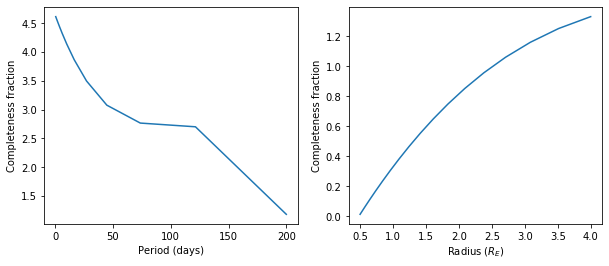

In [41]:
params = np.mean(sampler.flatchain, axis=0)
plot_marginalized_comps(params)

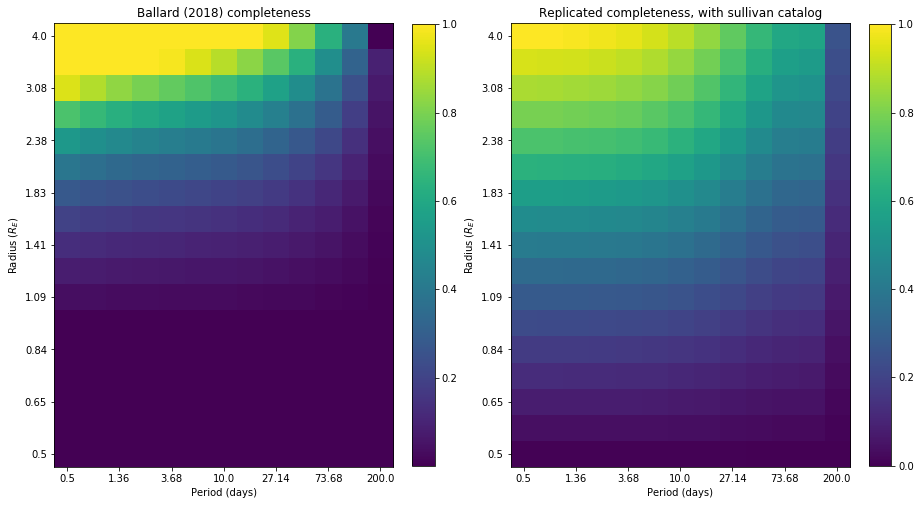

In [42]:
repcomp = np.outer(comp_poly(bins_p, *params[:4]), comp_poly(bins_r, *params[4:])).T
repcomp -= np.min(repcomp)
repcomp /= np.max(repcomp)
plot_overall_comps(repcomp, name)